# Social Media Ads Prediction
#### It predicts wheather the customer will purchase the product or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


# Note
- 'Purchased' is our target Variable.
- 0 means the item is not purchased and 1 means the item is purchased.
- From 'Age' and 'EstimatedSalry' we need to predict wheather a person will purchase or not.

In [4]:
# Checking for the missing Values in the dataset
df.isnull().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
x=df.drop(['Purchased'],axis=1)
y=df['Purchased']

In [8]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

# Data Visualization

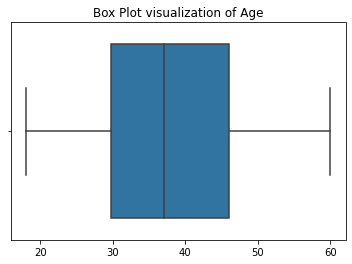

In [10]:
sns.boxplot(x = df.iloc[:, 0].values)
plt.title("Box Plot visualization of Age")
plt.show()

###### There are no Outliers in Age feature

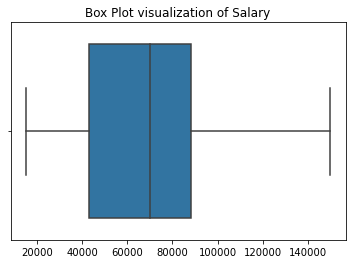

In [11]:
sns.boxplot(x = df.iloc[:, 1].values)
plt.title("Box Plot visualization of Salary")
plt.show()

###### There are no Outliers in Salary feature

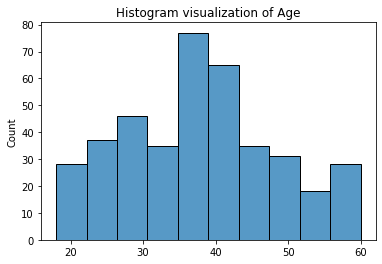

In [12]:
sns.histplot(x = df.iloc[:, 0].values)
plt.title("Histogram visualization of Age")
plt.show()


##### Maximum count is of age between 35 to 45 in the following dataset

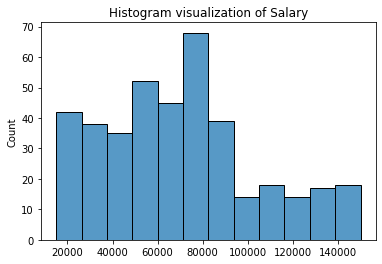

In [13]:
sns.histplot(x = df.iloc[:, 1].values)
plt.title("Histogram visualization of Salary")
plt.show()

##### Dataset mostly users are within salaries less than 90 thousand

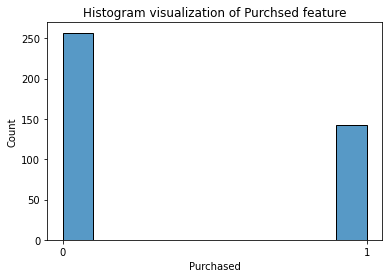

In [14]:
sns.histplot(x = df.iloc[:, 2])
plt.title("Histogram visualization of Purchsed feature")
plt.xticks([0, 1])
plt.show()

##### Count of not purchased is almost double as that of purchased

In [15]:
# Normalize the data first
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

### Splitting the data into train and test

In [16]:
from sklearn.model_selection import train_test_split

# I have divided the whole dataset into train and test where train dataset is 75% and test dataset into 25%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Applying KNN Model

Minimum error:- 0.07 at K = 3


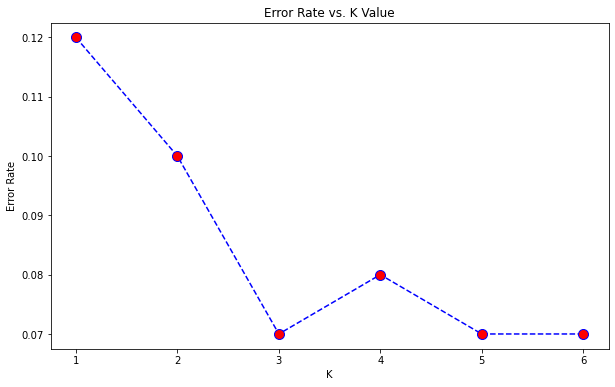

In [17]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,7):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

## Predicting the results

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

## Note:
- First diagonal is the accuratly predicted elements
- Second diagonal represents the errors we have in this model.